## Task 2. Vasicek implementation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [4]:
def vasicek_trajectory(x_start: float = 0.6,
                       k: float = 0.2,
                       theta: float = 0.01,
                       sigma: float = 0.1,
                       T: int = 100,
                       n_paths: int = 5,
                       n_steps: int = 1000
                      ):
    
    params = {'convergence rate': k,
             'LR mean': theta,
             'variance': sigma}
    
    # Normal distribution for calculation
    Z = np.random.normal(0.0, 1.0, [n_paths, n_steps])
    X = np.zeros([n_paths, n_steps + 1])
    time = np.zeros(n_steps + 1)
    
    X[:, 0] = x_start 
    dt = T/float(n_steps)

    for i in range(0, n_steps):
        # Vasicek discrete formula
        X[:, i+1] = X[:, i]*np.exp(-k*dt) + theta*(1-np.exp(-k*dt)) + \
                    sigma*np.sqrt((1-np.exp(-2*k*dt))/(2*k))*Z[:, i]
        time[i+1] = time[i] + dt
    
    
    paths = {'X': X,
             'time': time,
             'params': params}
    return paths

In [5]:
def plot_trajectory(time, paths, params, ax, include: bool = True):
    ax.plot(time, paths, label='paths')
    ax.grid()
    ax.set_title(params)
    ax.set_xlabel('t')
    ax.set_ylabel('X(t)')
    
    # to plot theta for Vasicek
    if include:
        ax.hlines(y=params['LR mean'],
                  xmin=0,
                  xmax=100,
                  linewidth=2,
                  color='b',
                  label='Theta')
        ax.legend()

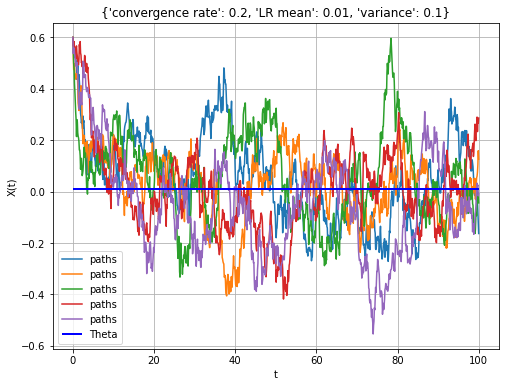

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

vas_proc = vasicek_trajectory()
time, path, params =  vas_proc['time'], vas_proc['X'], vas_proc['params']
plot_trajectory(time, np.transpose(path), params, ax=ax)

Lets check how trajectory changes with larger **k**

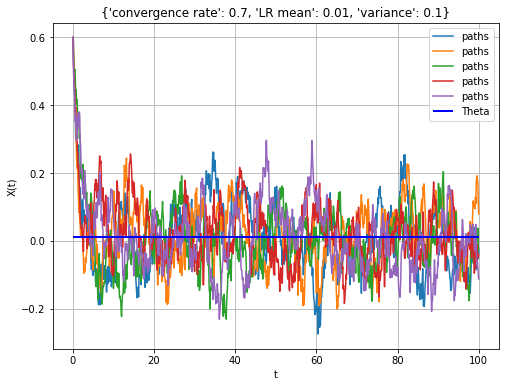

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

vas_proc = vasicek_trajectory(k=0.7)
time, path, params =  vas_proc['time'], vas_proc['X'], vas_proc['params']
plot_trajectory(time, np.transpose(path), params, ax=ax)

Our process returns to theta faster! And theta coresponds to mean level of process

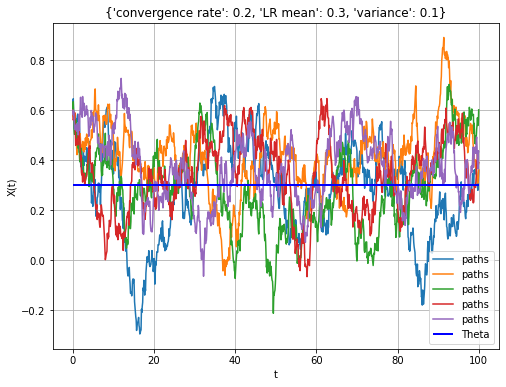

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

vas_proc = vasicek_trajectory(theta=0.3, k=0.2)
time, path, params =  vas_proc['time'], vas_proc['X'], vas_proc['params']
plot_trajectory(time, np.transpose(path), params, ax=ax)

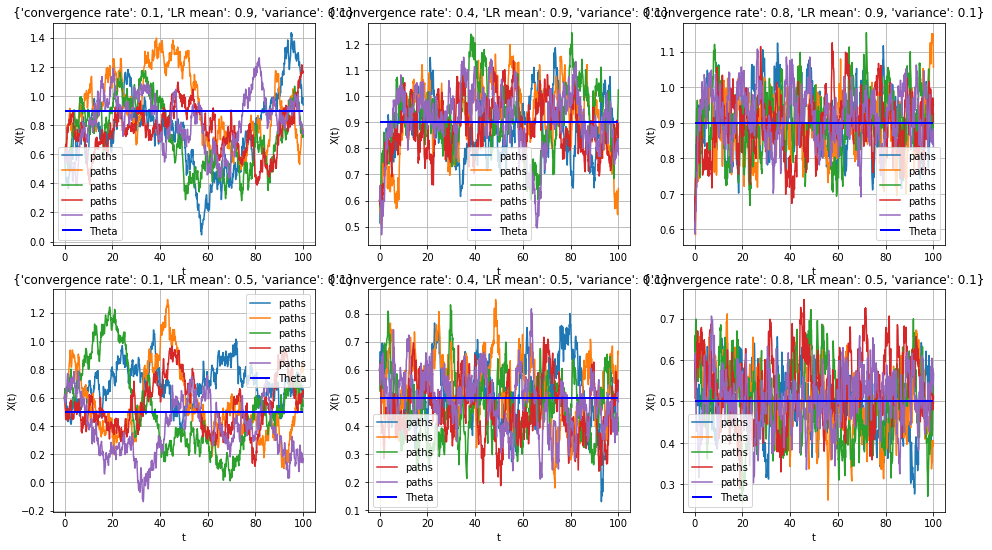

In [9]:
thetas = [0.9, 0.9, 0.9, 0.5, 0.5, 0.5]
ks = [0.1, 0.4, 0.8, 0.1, 0.4, 0.8]
fig, ax = plt.subplots(2,3, figsize=(16, 9))


for theta, k, matr in zip(thetas, ks, itertools.product([0, 1, 2], repeat=2)):
    vas_proc = vasicek_trajectory(theta=theta, k=k)
    time, path, params =  vas_proc['time'], vas_proc['X'], vas_proc['params']
    plot_trajectory(time, np.transpose(path), params, ax[matr[0], matr[1]])

## Task 3. Option price simulation

In [10]:
def gbm_process(n_paths: int = 10000,
                n_steps: int = 252,
                T: int = 1,
                r: float = 0.1,
                sigma: float = 0.4,
                S_0: int = 100):
    
    params = {'market rate': r,
              'sigma': sigma}
    
    Z = np.random.normal(0.0, 1.0, [n_paths, n_steps])
    X = np.zeros([n_paths, n_steps + 1])
    time = np.zeros(n_steps + 1)
    
    X[:, 0] = np.log(S_0)
    dt = T / float(n_steps)

    for k in range(0, n_steps):
        X[:, k+1] = X[:, k] + (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, k]
        time[k+1] = time[k] + dt
    
    S = np.exp(X)
    paths = {'S': S,
             'time': time,
             'params': params}

    return paths

In [11]:
def vanilla_call_price(paths: np.ndarray,
                       K: int = 110,
                       discount: float = 0.1,
                       T: int = 1):
    call_payoff = np.maximum(paths[:, -1] - K, 0)
    call_price = np.exp(-discount*T) * np.mean(call_payoff)
    return call_price

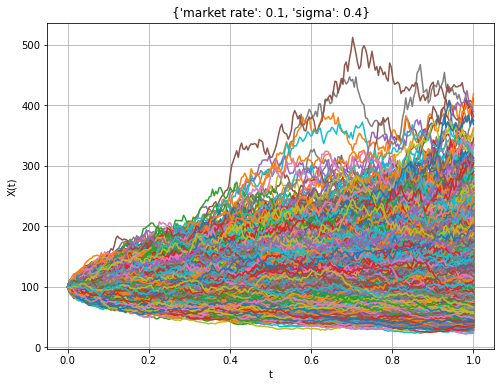

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

gdm = gbm_process(S_0=109, sigma=)
time, path, params =  gdm['time'], gdm['S'], gdm['params']
plot_trajectory(time, np.transpose(path), params, ax=ax, include=False)
#print(vanilla_call_price(np.transpose(path)))

In [13]:
print(f'vanilla call price is: {vanilla_call_price(path):.2f}')

vanilla call price is: 16.19
